<a href="https://colab.research.google.com/github/neerabhi/NLP/blob/main/nlp_word_vectors_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>NLP Tutorial: Word Vectors Overview Using Gensim Library</h3>

All gensim models are listed on this page: https://github.com/RaRe-Technologies/gensim-data

In [3]:
!pip install --upgrade gensim


In [5]:
!pip install numpy==1.23.5 --force-reinstall
!pip install --upgrade gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is i

In [9]:
import gensim.downloader as api

# This will download and load the Google News vectors (~1.6 GB)
#wv = api.load('word2vec-google-news-300')


In [4]:
wv.similarity(w1="great", w2="good")

0.7006069

In [ ]:
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [ ]:
wv.most_similar("dog")

[('dogs', 0.8680489659309387),
 ('puppy', 0.8106428384780884),
 ('pit_bull', 0.780396044254303),
 ('pooch', 0.7627376914024353),
 ('cat', 0.7609457969665527),
 ('golden_retriever', 0.7500901818275452),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418621778488159),
 ('pup', 0.740691065788269)]

In [ ]:
wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581)]

In [ ]:
wv.most_similar(positive=['france', 'berlin'], negative=['paris'], topn=5)

[('germany', 0.5094343423843384),
 ('european', 0.48650455474853516),
 ('german', 0.4714890420436859),
 ('austria', 0.46964022517204285),
 ('swedish', 0.4645182490348816)]

In [ ]:
wv.doesnt_match(["facebook", "cat", "google", "microsoft"])

'cat'

In [ ]:
wv.doesnt_match(["dog", "cat", "google", "mouse"])

'google'

<h3>Gensim: Glove</h3>

Stanford's page on GloVe: https://nlp.stanford.edu/projects/glove/

In [ ]:
glv = api.load("glove-twitter-25")

In [ ]:
glv.most_similar("good")

[('too', 0.9648017287254333),
 ('day', 0.9533665180206299),
 ('well', 0.9503170847892761),
 ('nice', 0.9438973665237427),
 ('better', 0.9425962567329407),
 ('fun', 0.9418926239013672),
 ('much', 0.9413353800773621),
 ('this', 0.9387555122375488),
 ('hope', 0.9383506774902344),
 ('great', 0.9378516674041748)]

In [ ]:
glv.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

In [ ]:
glv.doesnt_match("facebook cat google microsoft".split())

'cat'

In [ ]:
glv.doesnt_match("banana grapes orange human".split())

'human'

### **Fake new detection using Genism**

In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("/content/fake_and_real_news.csv")

In [7]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [10]:
wv.similarity('good','great')

0.7006069

In [11]:
wv.most_similar('great')

[('greatest', 0.7079940438270569),
 ('good', 0.7006068825721741),
 ('well', 0.687130331993103),
 ('brought', 0.6693516969680786),
 ('much', 0.6664959192276001),
 ('tremendous', 0.6647360324859619),
 ('lot', 0.6575665473937988),
 ('especially', 0.6524294018745422),
 ('important', 0.647465169429779),
 ('always', 0.646425187587738)]

In [12]:
wv_great = wv["great"]
wv_good = wv["good"]

In [13]:
wv_great.shape

(200,)

In [14]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [15]:
df['label1']=df['label'].map({'Fake':0,'Real':1})

In [16]:
df.head()

,Text,label,label1
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [18]:
import spacy
!python -m spacy download en_core_web_lg

nlp=spacy.load('en_core_web_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
def preproce(text):
  doc=nlp(text)
  filtered_token=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_token.append(token.lemma_)
  return wv.get_mean_vector(filtered_token)

In [22]:
v=preproce("Hellow this is Abhishek kumar I living in Agra")
v.shape

(200,)

In [23]:
df['vector']=df['Text'].apply(lambda text: preproce(text))

In [24]:
df.head()

,Text,label,label1,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.035706397, 0.03533986, -0.03167796, 0.00186..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.004028803, 0.059420403, 0.0048223054, 0.00..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.014939456, 0.017604223, -0.028910924, -0.00..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.006379996, 0.027367575, -0.0150384065, -0...."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[0.0023486856, 0.022433612, 0.0048411316, -0.0..."


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df['vector'],df['label1'], test_size=0.2)

In [26]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (7920,)
Shape of X_test before reshaping:  (1980,)
Shape of X_train after reshaping:  (7920, 200)
Shape of X_test after reshaping:  (1980, 200)


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gr=GradientBoostingClassifier()
gr.fit(X_train_2d, y_train)
y_pred=gr.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1007
           1       0.97      0.98      0.97       973

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



In [29]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preproce(n) for n in test_news]
gr.predict(test_news_vectors)

array([1, 0, 0])

Text(95.72222222222221, 0.5, 'Truth')

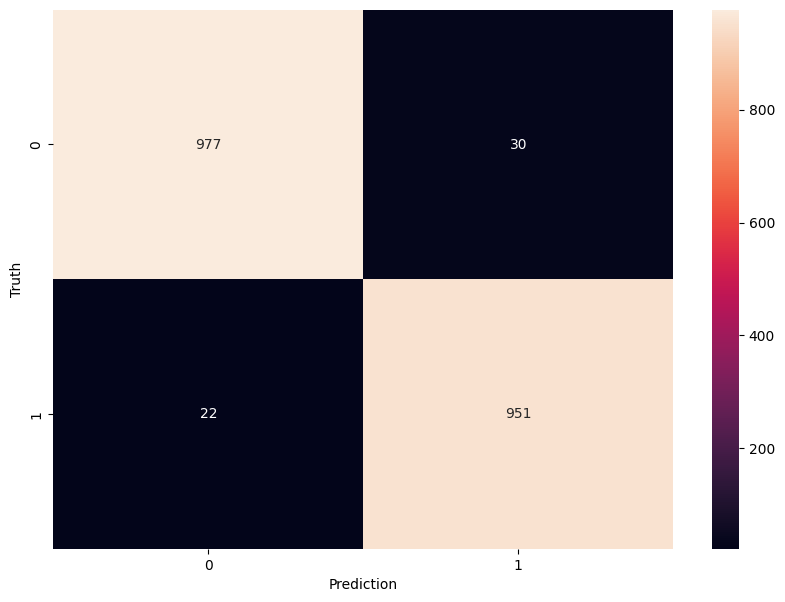

In [30]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')